<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Actividad2_2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("IMDB Dataset.csv")

# Mostrar las primeras 5 entradas
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
#Checking Dataset Description
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [ ]:
#Sentiment count
print('Total: \n', df['sentiment'].value_counts())

Total: 
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
review=[]
sentences=list(df['review'])
for sen in sentences:
    review.append(sen)

In [ ]:
import numpy as np

labels=df['sentiment']
labels=np.array(list(map(lambda x: 1 if x== 'positive' else 0, labels)))

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [ ]:
#parameters
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

#Generate the word index dictionary for the training sentence
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

#Generate and pad the trainig sentence
sentences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sentences,maxlen = max_length, truncating = trunc_type)

#Generate and pad the test sentence
test_sequences = tokenizer.texts_to_sequences(test_sentences) # Convert text to sequences
test_padded = pad_sequences(test_sequences,maxlen = max_length, truncating = trunc_type) # Pad the sequences

In [ ]:
# Build the model
model= keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Print the model sumary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6734 - loss: 0.5617 - val_accuracy: 0.8372 - val_loss: 0.3630
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9010 - loss: 0.2505 - val_accuracy: 0.8334 - val_loss: 0.3834
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9719 - loss: 0.1051 - val_accuracy: 0.8268 - val_loss: 0.4769
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9938 - loss: 0.0324 - val_accuracy: 0.8169 - val_loss: 0.6198
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9992 - loss: 0.0079 - val_accuracy: 0.8201 - val_loss: 0.7092
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9996 - loss: 0.0032 - val_accuracy: 0.8230 - val_loss: 0.8021
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.8235 - val_loss: 0.8853
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 3.9601e

<Axes: >

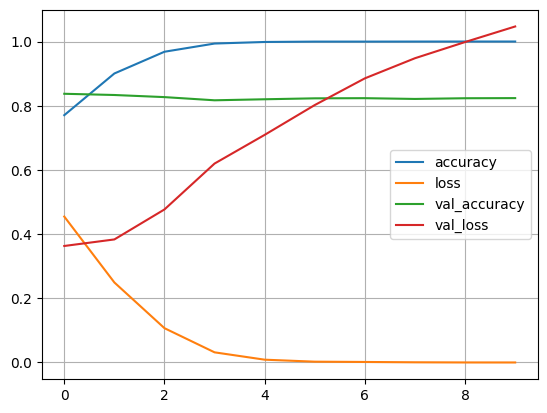

In [ ]:
#Train the model
history=model.fit(padded,
                  train_labels,
                  epochs=10,
                  validation_data=(test_padded, test_labels))

#Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
# Build the model
model= keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True), #MEMORIA DE CORTO Y LARGO PLAZO
    keras.layers.LSTM(32),
    keras.layers.Flatten(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Print the model sumary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 130s 101ms/step - accuracy: 0.6780 - loss: 0.5678 - val_accuracy: 0.8269 - val_loss: 0.3927
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 98ms/step - accuracy: 0.8609 - loss: 0.3337 - val_accuracy: 0.8455 - val_loss: 0.3562
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 149s 104ms/step - accuracy: 0.8908 - loss: 0.2729 - val_accuracy: 0.8430 - val_loss: 0.3777
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 137s 99ms/step - accuracy: 0.9065 - loss: 0.2372 - val_accuracy: 0.8493 - val_loss: 0.3593
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accuracy: 0.9224 - loss: 0.2006 - val_accuracy: 0.8390 - val_loss: 0.3955
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 98ms/step - accuracy: 0.9374 - loss: 0.1652 - val_accuracy: 0.8390 - val_loss: 0.4820
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 97ms/step - accuracy: 0.9499 - loss: 0.1367 - val_accuracy: 0.8341 - val_loss: 0.5092
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 98ms/step - accuracy

<Axes: >

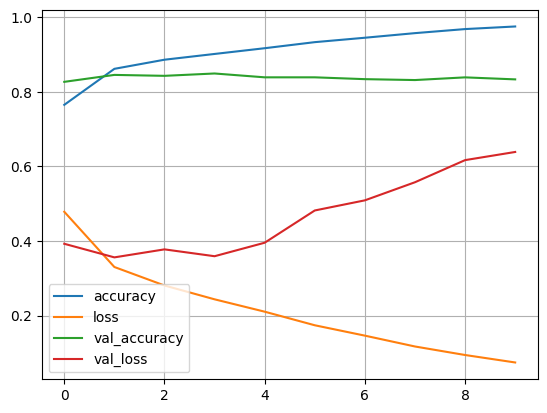

In [ ]:
#Train the model
history=model.fit(padded,
                  train_labels,
                  epochs=10,
                  validation_data=(test_padded, test_labels))

#Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)